In [4]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\alsrn\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [258]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')

In [259]:
Regression = pd.read_csv("C:/Users/alsrn/파이썬/지수산식회귀분석용.csv")

In [260]:
Regression.columns

Index(['상품명', '매출액', '구매의사', '긍정확률', '환불수량', '욕망지표', '주문수', '긍정확률합', '평균긍정확률',
       '평균평점', '신뢰도점수'],
      dtype='object')

수치형데이터로 변환하기 위해 데이터타입 확인

In [261]:
Regression.dtypes

상품명        object
매출액        object
구매의사        int64
긍정확률      float64
환불수량      float64
욕망지표      float64
주문수         int64
긍정확률합     float64
평균긍정확률    float64
평균평점      float64
신뢰도점수     float64
dtype: object

수치형데이터확인

In [292]:
Regre["매출액"] = Regre["매출액"].astype(int)

In [293]:
Regre["긍정확률"] = Regre["긍정확률"].astype(float)

In [288]:
Regression["매출액"] = [str(x).replace(',','') for x in Regression["매출액"]]

* 결측값있는 행 지우기

In [289]:
Regre = Regression.dropna(axis = 0)

이상치 지우기 위해 환불비율이 0, 2인 행 지우기

In [290]:
Regre = Regre.drop(Regre[Regre["환불수량"] == 0].index)

In [291]:
Regre = Regre.drop(Regre[Regre["환불수량"] == 2].index)

In [294]:
Regre.dtypes

상품명        object
매출액         int32
구매의사        int64
긍정확률      float64
환불수량      float64
욕망지표      float64
주문수         int64
긍정확률합     float64
평균긍정확률    float64
평균평점      float64
신뢰도점수     float64
dtype: object

<AxesSubplot:xlabel='매출액', ylabel='환불수량'>

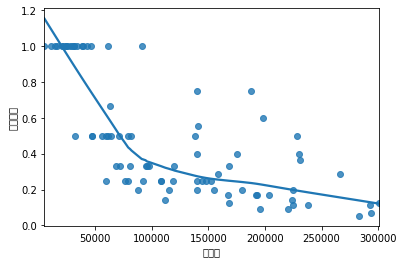

In [295]:
sns.regplot(Regre['매출액'][30:],Regre['환불수량'][30:], lowess=True)

<AxesSubplot:xlabel='매출액', ylabel='신뢰도점수'>

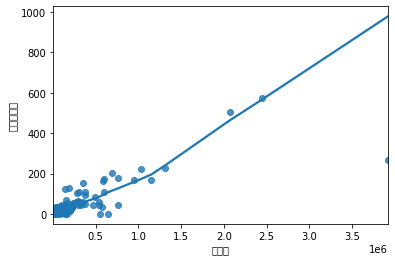

In [296]:
sns.regplot('매출액', '신뢰도점수', lowess=True, data = Regre)

* 선형성 확인후 회귀분석 시작

In [297]:
x_data = Regre[["신뢰도점수","환불수량"]] #X1 X2
target = Regre[["매출액"]]# Y1

In [298]:
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [299]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     105.4
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.69e-26
Time:                        14:22:13   Log-Likelihood:                -1582.4
No. Observations:                 113   AIC:                             3171.
Df Residuals:                     110   BIC:                             3179.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   5.52e+04      2.030      0.045    2638.675    2.21e+05
신뢰도점수       4527.9965    355.955     12.721      0.000    3822.578    5233.415
환불수량       -1.654e+05   9.32e+04     -1.775      0.079    -3.5e+05    1.93e+04
==============================================================================
Omnibus:                      184.097   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14683.592
Skew:                           6.376   Prob(JB):                         0.00
Kurtosis:                      57.369   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 각 변수의 계수 확인

In [246]:
fitted_multi_model.params

const     6373.509412
구매의사     22370.531017
긍정확률      8657.789026
환불수량    -13571.114631
욕망지표     -1830.842730
dtype: float64

* 각 변수들끼리 상관성 확인

In [167]:
x_data2.corr()

,구매의사,긍정확률,환불수량
구매의사,1.000000,0.028570,-0.031673
긍정확률,0.028570,1.000000,0.049035
환불수량,-0.031673,0.049035,1.000000
